In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn kaggle flask joblib



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "C:\\Users\\adjei\\"

!kaggle datasets list -s fraud


ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
mlg-ulb/creditcardfraud                                     Credit Card Fraud Detection                         66MB  2018-03-23 01:17:27         820748      11895  0.85294116       
whenamancodes/fraud-detection                               Fraud Detection                                     66MB  2022-09-12 11:54:40           9706        115  1.0              
dhanushnarayananr/credit-card-fraud                         Credit Card Fraud                                   29MB  2022-05-07 15:09:29          20361        197  0.9411765        
ealaxi/paysim1                                              Synthetic Financial Datas

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud --unzip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0




  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|1         | 1.00M/66.0M [00:00<00:07, 9.26MB/s]
 11%|#         | 7.00M/66.0M [00:00<00:01, 39.0MB/s]
 24%|##4       | 16.0M/66.0M [00:00<00:00, 60.3MB/s]
 39%|###9      | 26.0M/66.0M [00:00<00:00, 73.0MB/s]
 55%|#####4    | 36.0M/66.0M [00:00<00:00, 82.0MB/s]
 68%|######8   | 45.0M/66.0M [00:00<00:00, 85.9MB/s]
 82%|########1 | 54.0M/66.0M [00:00<00:00, 83.3MB/s]
 94%|#########4| 62.0M/66.0M [00:00<00:00, 83.2MB/s]
100%|##########| 66.0M/66.0M [00:00<00:00, 74.5MB/s]


In [5]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Get dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for missing values
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

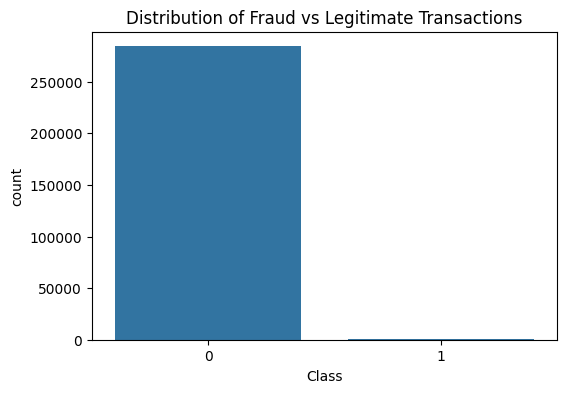

Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each class
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Distribution of Fraud vs Legitimate Transactions")
plt.show()

# Print counts
fraud_count = df['Class'].value_counts()
print(fraud_count)


In [9]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])


In [10]:
df.drop(columns=['Time'], inplace=True)


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [13]:
y_pred = rf_model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



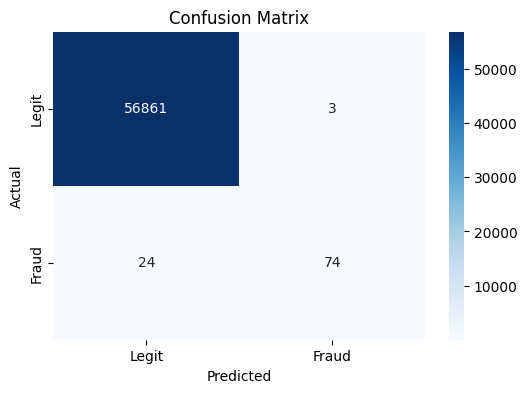

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Score: {roc_score:.4f}")


AUC-ROC Score: 0.8775


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [18]:
param_grid = {
    'n_estimators': [100, 200],   # Reduced from [100, 200, 300]
    'max_depth': [10, None],      # Removed intermediate values
    'min_samples_split': [2, 5],  # Reduced choices
    'min_samples_leaf': [1, 2],   # Reduced choices
    'class_weight': ['balanced']  # Keeps the model balanced
}


In [19]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, 
    n_iter=10,  # Number of random combinations to test
    cv=3, scoring='recall', verbose=2, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced'}


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



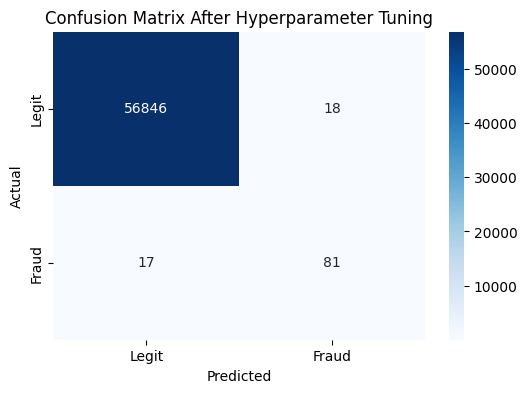

AUC-ROC Score after tuning: 0.9131


In [20]:
# Get the best model
best_model = random_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.show()

# Compute AUC-ROC Score
roc_score = roc_auc_score(y_test, y_pred_tuned)
print(f"AUC-ROC Score after tuning: {roc_score:.4f}")


In [21]:
import joblib

# Save the trained model
joblib.dump(best_model, "fraud_detection_model.pkl")

print("Model saved successfully!")


Model saved successfully!
